# Exploratory Data Analysis (EDA) для данных о химических соединениях

В этом ноутбуке мы проведём исследовательский анализ данных о химических соединениях и их эффективности против вируса гриппа.

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)

## Загрузка данных

In [6]:
# Загрузка данных из Excel файла
df = pd.read_excel('Данные_для_курсовои_Классическое_МО.xlsx', sheet_name='Sheet1')

# Первые 5 строк данных
df.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,...,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,340.300,384.350449,158,0,0.038844,-0.293526,0.293526,0.038844,0.642857,1.035714,1.321429,14.822266,9.700470,2.600532,-2.343082,2.644698,-2.322229,5.944519,0.193481,3.150503,1.164038,611.920301,20.208896,19.534409,19.534409,13.127794,12.204226,12.204226,12.058078,12.058078,10.695991,10.695991,7.340247,7.340247,-0.66,2.187750e+06,20.606247,6.947534,2.868737,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,340.300,388.381750,162,0,0.012887,-0.313407,0.313407,0.012887,0.607143,1.000000,1.285714,14.975110,9.689226,2.614066,-2.394690,2.658342,-2.444817,5.134527,0.120322,3.150503,1.080362,516.780124,20.208896,19.794682,19.794682,13.127794,12.595754,12.595754,12.648545,12.648545,11.473090,11.473090,8.180905,8.180905,-0.08,2.187750e+06,21.163454,7.257648,3.027177,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,388.344,446.458903,186,0,0.094802,-0.325573,0.325573,0.094802,0.562500,0.906250,1.156250,15.353938,9.681293,2.665274,-2.477203,2.679014,-2.565224,5.117187,-0.922902,3.214947,1.219066,643.620154,23.794682,23.689110,23.689110,14.595754,14.249005,14.249005,15.671216,15.671216,13.402236,13.402236,10.140303,10.140303,-0.08,8.610751e+06,25.026112,7.709373,3.470070,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,352.311,398.366099,164,0,0.038844,-0.293526,0.293526,0.038844,0.620690,1.000000,1.310345,14.821216,9.700497,2.600529,-2.342885,2.644709,-2.322030,5.944502,0.193510,3.179270,1.120513,626.651366,20.916003,20.241516,20.241516,13.627794,12.704226,12.704226,12.411631,12.411631,10.945991,10.945991,7.517023,7.517023,-0.66,3.572142e+06,21.567454,7.485204,3.263848,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,424.377,466.334799,184,0,0.062897,-0.257239,0.257239,0.062897,0.600000,0.971429,1.257143,14.831112,9.700386,2.602486,-2.342009,2.648473,-2.318893,5.963448,0.193687,3.337074,1.136678,1101.164252,24.639617,22.617677,22.617677,16.526773,13.868825,13.868825,13.613700,13.613700,11.833480,11.833480,8.119076,8.119076,-2.22,1.053758e+08,23.194917,7.639211,3.345855,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Предварительный анализ данных

In [7]:
# Основная информация о данных
print("Размер данных:", df.shape)
print("\nИнформация о данных:")
df.info()

Размер данных: (1001, 214)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


In [8]:
# Описательная статистика
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1001.0,500.000000,289.108111,0.000000,250.000000,500.000000,750.000000,1000.000000
"IC50, mM",1001.0,222.805156,402.169734,0.003517,12.515396,46.585183,224.975928,4128.529377
"CC50, mM",1001.0,589.110728,642.867508,0.700808,99.999036,411.039342,894.089176,4538.976189
SI,1001.0,72.508823,684.482739,0.011489,1.433333,3.846154,16.566667,15620.600000
MaxAbsEStateIndex,1001.0,10.831637,3.307505,2.321942,9.252350,12.179236,13.167843,15.933463
...,...,...,...,...,...,...,...,...
fr_thiazole,1001.0,0.051948,0.222033,0.000000,0.000000,0.000000,0.000000,1.000000
fr_thiocyan,1001.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fr_thiophene,1001.0,0.069930,0.255157,0.000000,0.000000,0.000000,0.000000,1.000000
fr_unbrch_alkane,1001.0,0.204795,1.215326,0.000000,0.000000,0.000000,0.000000,20.000000


## Анализ целевых переменных (IC50, CC50, SI)

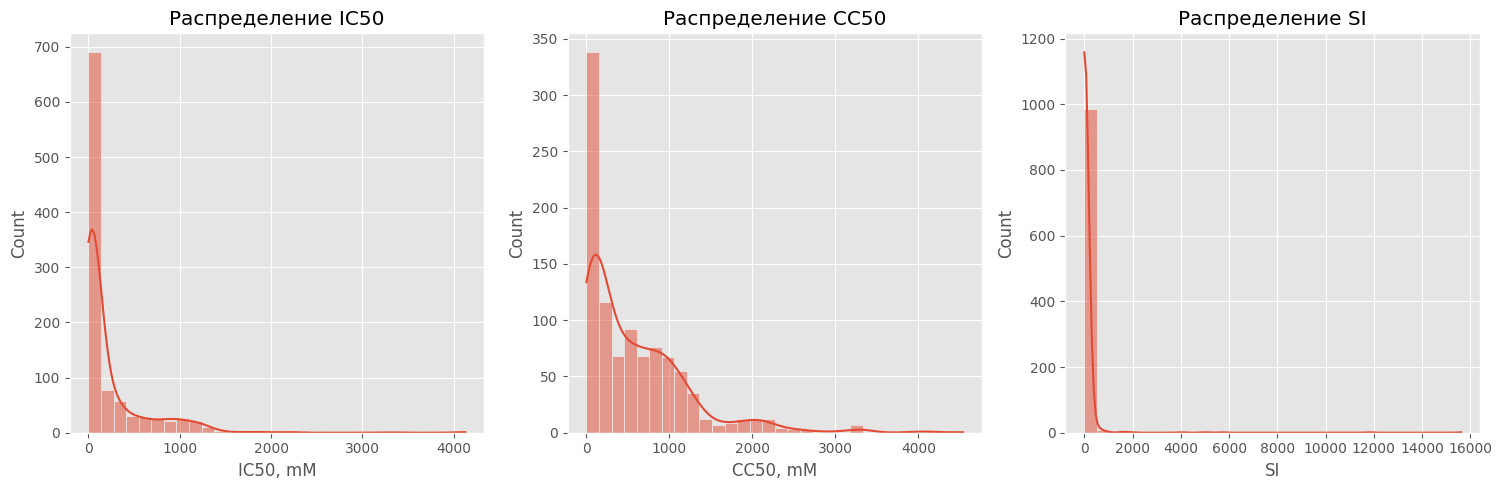

In [9]:
# Гистограммы целевых переменных
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['IC50, mM'], kde=True, bins=30)
plt.title('Распределение IC50')

plt.subplot(1, 3, 2)
sns.histplot(df['CC50, mM'], kde=True, bins=30)
plt.title('Распределение CC50')

plt.subplot(1, 3, 3)
sns.histplot(df['SI'], kde=True, bins=30)
plt.title('Распределение SI')

plt.tight_layout()
plt.show()

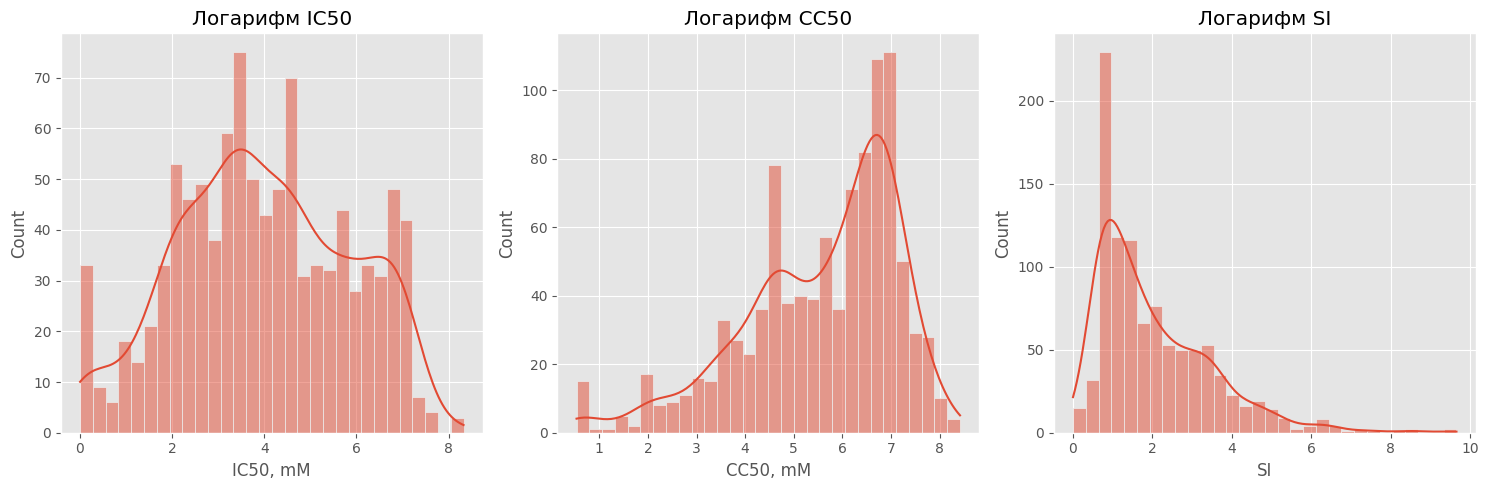

In [10]:
# Логарифмическое преобразование для нормализации
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(np.log1p(df['IC50, mM']), kde=True, bins=30)
plt.title('Логарифм IC50')

plt.subplot(1, 3, 2)
sns.histplot(np.log1p(df['CC50, mM']), kde=True, bins=30)
plt.title('Логарифм CC50')

plt.subplot(1, 3, 3)
sns.histplot(np.log1p(df['SI']), kde=True, bins=30)
plt.title('Логарифм SI')

plt.tight_layout()
plt.show()

## Анализ корреляций

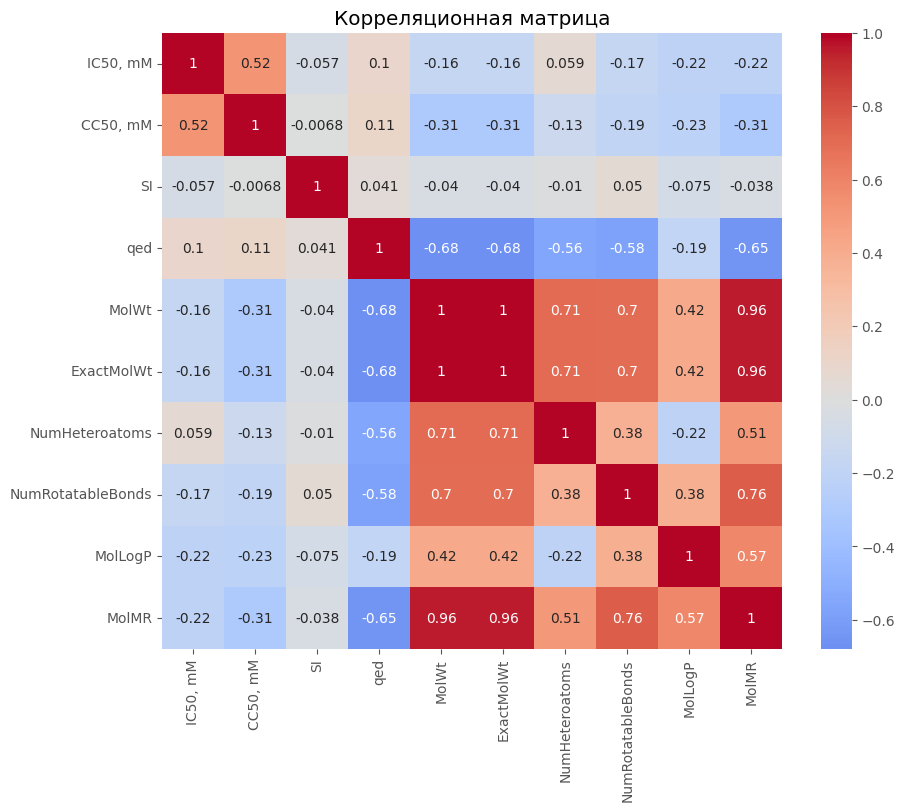

In [11]:
# Корреляционная матрица для целевых переменных и некоторых признаков
corr_matrix = df[['IC50, mM', 'CC50, mM', 'SI', 'qed', 'MolWt', 'ExactMolWt', 'NumHeteroatoms', 'NumRotatableBonds', 'MolLogP', 'MolMR']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.show()

## Анализ выбросов

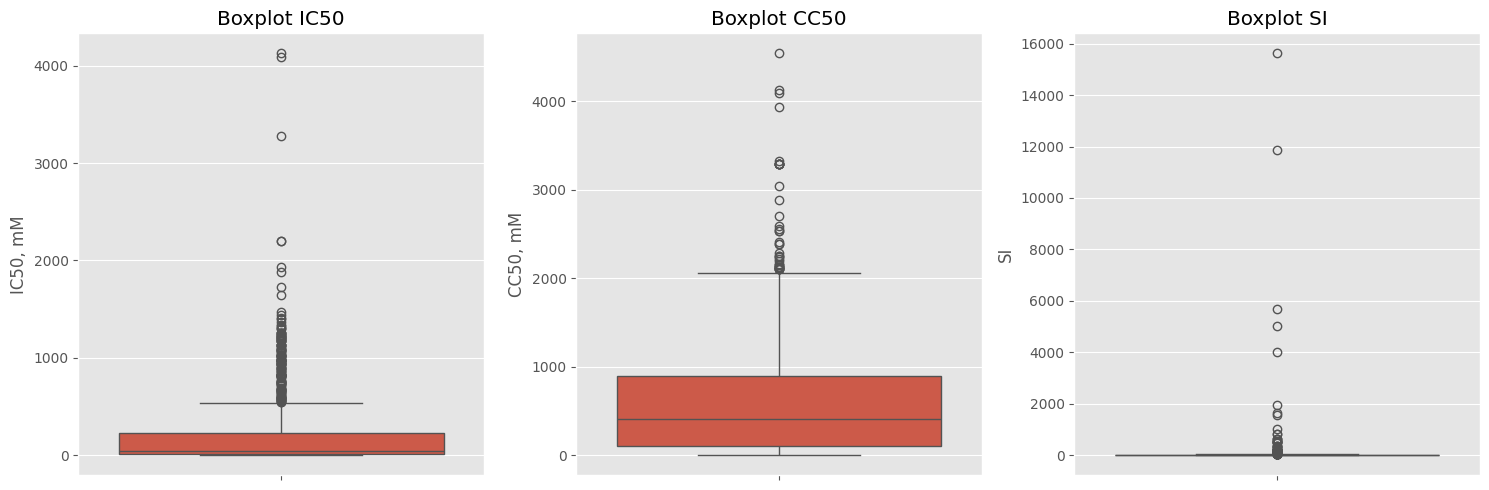

In [12]:
# Boxplot для целевых переменных
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['IC50, mM'])
plt.title('Boxplot IC50')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['CC50, mM'])
plt.title('Boxplot CC50')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['SI'])
plt.title('Boxplot SI')

plt.tight_layout()
plt.show()

In [13]:
# Функция для определения выбросов с помощью метода IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Выбросы для IC50
outliers_ic50 = detect_outliers(df, 'IC50, mM')
print(f"Количество выбросов для IC50: {len(outliers_ic50)}")

# Выбросы для CC50
outliers_cc50 = detect_outliers(df, 'CC50, mM')
print(f"Количество выбросов для CC50: {len(outliers_cc50)}")

# Выбросы для SI
outliers_si = detect_outliers(df, 'SI')
print(f"Количество выбросов для SI: {len(outliers_si)}")

Количество выбросов для IC50: 147
Количество выбросов для CC50: 39
Количество выбросов для SI: 125


## Анализ признаков

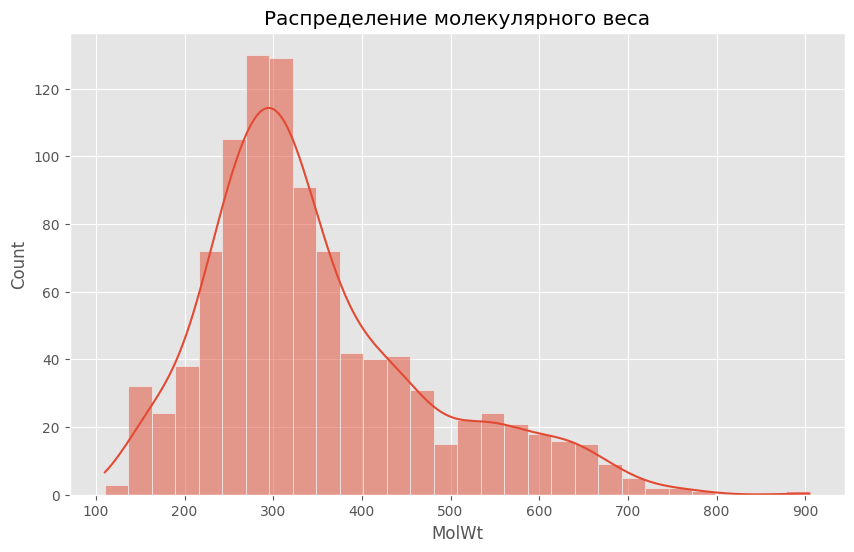

In [14]:
# Распределение молекулярного веса
plt.figure(figsize=(10, 6))
sns.histplot(df['MolWt'], kde=True, bins=30)
plt.title('Распределение молекулярного веса')
plt.show()

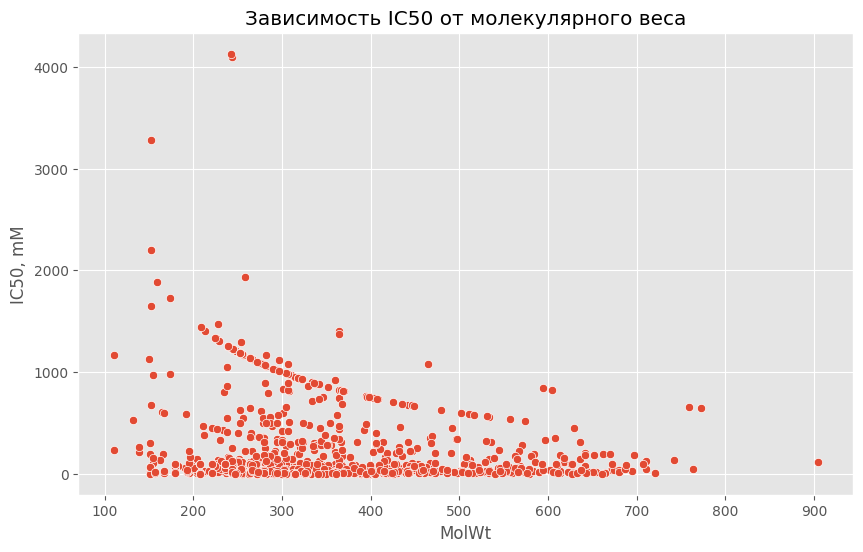

In [15]:
# Взаимосвязь молекулярного веса и IC50
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['MolWt'], y=df['IC50, mM'])
plt.title('Зависимость IC50 от молекулярного веса')
plt.show()

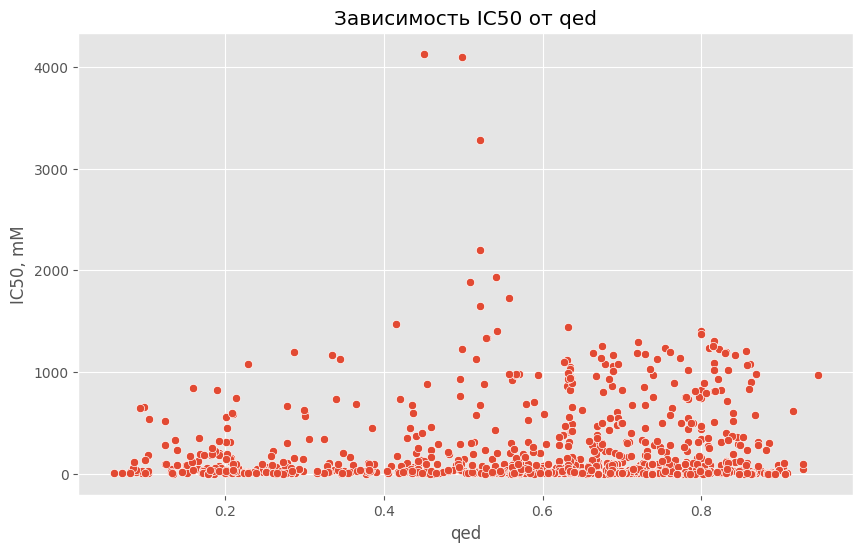

In [16]:
# Взаимосвязь qed (квантовая эффективность препарата) и IC50
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['qed'], y=df['IC50, mM'])
plt.title('Зависимость IC50 от qed')
plt.show()

## Анализ категориальных признаков

In [17]:
# Количество уникальных значений для каждого признака
unique_counts = df.nunique().sort_values()
print("Количество уникальных значений по признакам:")
print(unique_counts)

Количество уникальных значений по признакам:
NumRadicalElectrons       1
SMR_VSA8                  1
SlogP_VSA9                1
fr_thiocyan               1
fr_phos_ester             1
                       ... 
Chi4v                   804
Chi3v                   804
CC50, mM                888
IC50, mM                953
Unnamed: 0             1001
Length: 214, dtype: int64


## Анализ мультиколлинеарности

In [18]:
# Вычисление VIF для оценки мультиколлинеарности
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Выберем несколько числовых признаков для анализа
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if df[col].nunique() > 10][:20]  # ограничим количество для примера

# Очистим данные от бесконечностей и NaN
df_clean = df[numeric_cols].replace([np.inf, -np.inf], np.nan).dropna()

# Вычисление VIF
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_cols
vif_data["VIF"] = [variance_inflation_factor(df_clean[numeric_cols].values, i) 
                  for i in range(len(numeric_cols)) if numeric_cols[i] in df_clean.columns]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data

,feature,VIF
5,MaxEStateIndex,inf
4,MaxAbsEStateIndex,inf
12,ExactMolWt,9.602600e+06
10,MolWt,9.138658e+06
16,MaxAbsPartialCharge,8.430700e+04
15,MinPartialCharge,8.035192e+04
14,MaxPartialCharge,3.367102e+04
17,MinAbsPartialCharge,3.082403e+04
11,HeavyAtomMolWt,1.065453e+04
13,NumValenceElectrons,2.041437e+03


## PCA анализ для визуализации данных

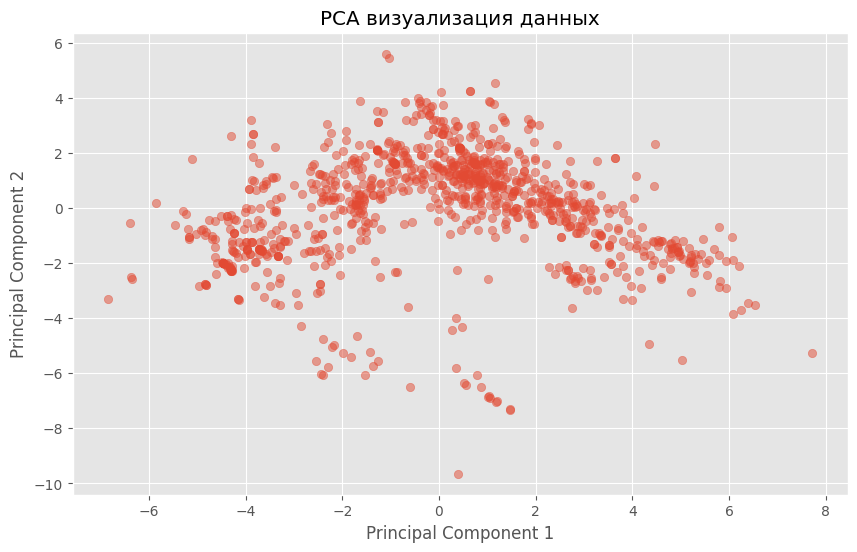

In [19]:
# Стандартизация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols].fillna(0))

# Применение PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Визуализация PCA
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA визуализация данных')
plt.show()

In [21]:
# Объяснённая дисперсия
print("Объяснённая дисперсия компонент:", pca.explained_variance_ratio_)

Объяснённая дисперсия компонент: [0.370069  0.1999159]


## Выводы EDA

1. **Целевые переменные**:
   - IC50, CC50 и SI имеют правостороннее распределение, логарифмическое преобразование делает их более нормальными
   - Имеются выбросы, особенно в CC50 и SI

2. **Корреляции**:
   - SI имеет сильную корреляцию с IC50 и CC50 (что ожидаемо, так как SI = CC50/IC50)
   - Некоторые молекулярные характеристики (MolWt, NumRotatableBonds) имеют умеренную корреляцию с целевыми переменными

3. **Признаки**:
   - Многие признаки имеют высокую корреляцию между собой (мультиколлинеарность)
   - Некоторые признаки имеют постоянные значения и могут быть удалены

4. **Рекомендации**:
   - Применить логарифмическое преобразование для целевых переменных
   - Рассмотреть удаление или преобразование выбросов
   - Удалить или объединить высококоррелированные признаки
   - Использовать методы регуляризации для борьбы с мультиколлинеарностью